In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import seaborn as sns
from scipy import stats

In [2]:
runs =[
    "SA", "SA_CA", 
    "SA_SR","SA_CM", "SA_CTRD", "MD",   
    "CG", "CG_MD"
]   

In [3]:
def get_ref_secondary():
    """returns a DataFrame containing all the reference structure values"""
    ref_df = pd.read_csv("../RAW_DATA/reference-stride.csv", index_col = 0)
  
    return ref_df

def make_secondary_df(run):
  
    df_3J95 = pd.read_csv(("../RAW_DATA/{}/3J95_stride.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("../RAW_DATA/{}/3J96_stride.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("../RAW_DATA/{}/5GRS_stride.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("../RAW_DATA/{}/5HNY_stride.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("../RAW_DATA/{}/5WCB_stride.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("../RAW_DATA/{}/6ACG_stride.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("../RAW_DATA/{}/6AHF_stride.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("../RAW_DATA/{}/6IRF_stride.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("../RAW_DATA/{}/6N1Q_stride.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("../RAW_DATA/{}/6N7G_stride.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("../RAW_DATA/{}/6N8Z_stride.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("../RAW_DATA/{}/6R7I_stride.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("../RAW_DATA/{}/6UBY_stride.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("../RAW_DATA/{}/6UC0_stride.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

In [4]:
def make_stride_df(run, wrong_names=False):
    column_names = {"Helix" : "Sheet", "Sheet" : "Helix"}
    ref_df = get_ref_secondary()
    stride_df = make_secondary_df(run)
    ref = ref_df.div(ref_df["All"], axis = 0).mul(100).rename(columns=column_names)
    total_df = pd.DataFrame()
    for df in stride_df:
        if wrong_names:
            df = df.rename(columns=column_names)
        
        struct = "{}.pdb".format(df.index[1][0:4])
        
        df = df.iloc[:,1:6]
        df = df.div(df['All'], axis = 0).mul(100)

        new_df = pd.DataFrame()
        for index, value in ref.loc[struct].iteritems():
            add_df = df.loc[:,index].sub(value)
            new_df = pd.concat([new_df,add_df], axis=1)

        new_df.pop("All")
        total_df = pd.concat([total_df, new_df], ignore_index=True)
    return total_df

In [5]:
sheet_df = pd.DataFrame()
helix_df = pd.DataFrame()
turn_df = pd.DataFrame()
coil_df = pd.DataFrame()
for run in runs:
    df = make_stride_df(run)
    sheet_df = pd.concat([sheet_df, df["Sheet"]], axis = 1)
    sheet_df = sheet_df.rename(columns={"Sheet": run})
    
    helix_df = pd.concat([helix_df, df["Helix"]], axis = 1)
    helix_df = helix_df.rename(columns={"Helix": run})
    
    turn_df = pd.concat([turn_df, df["Turn"]], axis = 1)
    turn_df = turn_df.rename(columns={"Turn": run})
    
    coil_df = pd.concat([coil_df, df["Coil"]], axis = 1)
    coil_df = coil_df.rename(columns={"Coil": run})


Text(-1.12, 2, 'D')

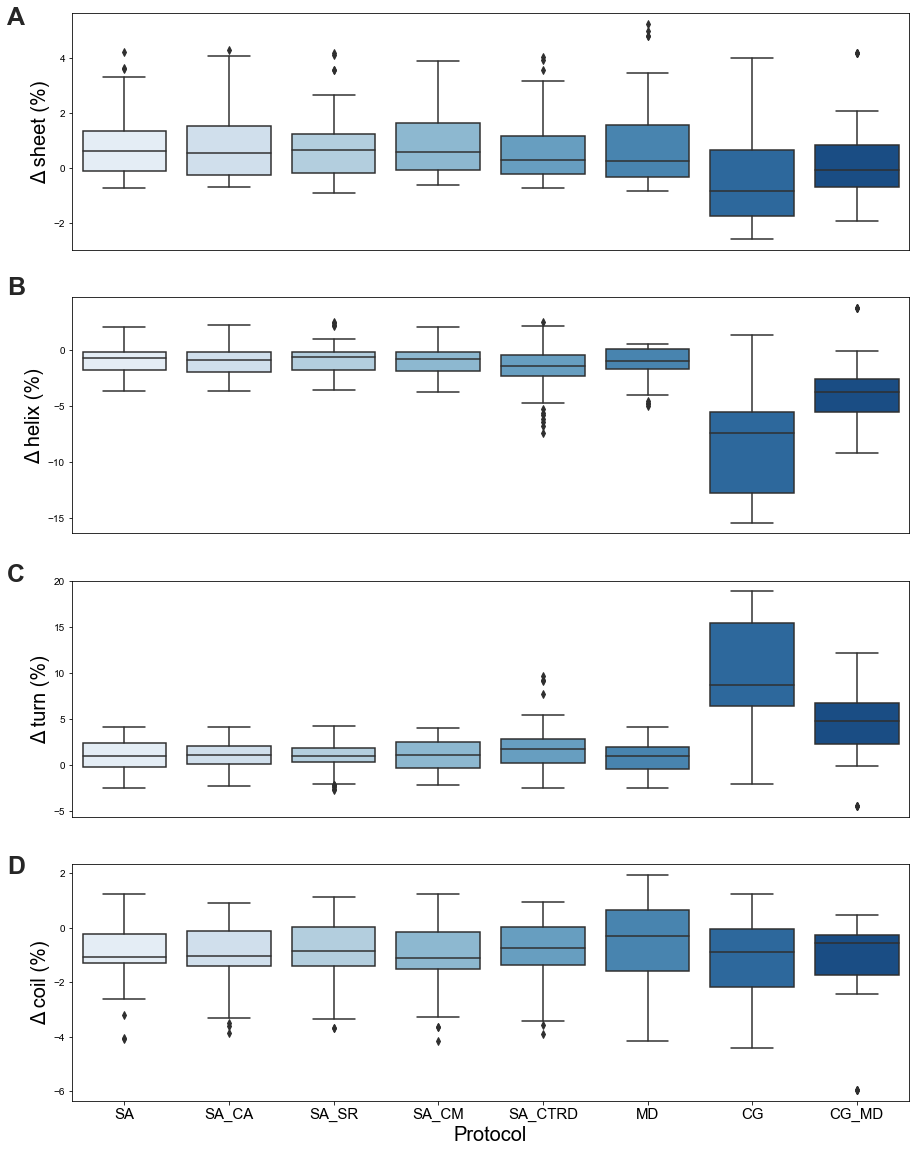

In [6]:
fig, ax = plt.subplots(nrows = 4, figsize = (15, 20))
sns.set(font_scale=1.5, style="whitegrid")

plot_sheet = sns.boxplot(data=sheet_df, ax=ax[0], palette="Blues")
plot_helix = sns.boxplot(data=helix_df, ax=ax[1], palette="Blues")
plot_turn = sns.boxplot(data=turn_df, ax=ax[2], palette="Blues")
plot_coil = sns.boxplot(data=coil_df, ax=ax[3], palette="Blues")

plot_sheet.set_xticks([])
plot_helix.set_xticks([])
plot_turn.set_xticks([])

plot_coil.set_xticklabels(runs, fontsize=15)

plot_sheet.set_ylabel("Δ sheet (%)", fontsize=20)
plot_helix.set_ylabel("Δ helix (%)", fontsize=20)
plot_turn.set_ylabel("Δ turn (%)", fontsize=20)
plot_coil.set_ylabel("Δ coil (%)", fontsize=20)
plot_coil.set_xlabel("Protocol", fontsize=20)

plot_sheet.text(-1.12,5.2,"A", fontsize=25, weight="semibold")
plot_helix.text(-1.12,5,"B", fontsize=25, weight="semibold")

plot_turn.text(-1.12,20,"C", fontsize=25, weight="semibold")
plot_coil.text(-1.12,2,"D", fontsize=25, weight="semibold")




# plt.savefig("stride-final", dpi = 300)